# Homework #5 (100 pts)
**Due:** Thursday February 15th, 11:59PM via Blackboard.  

**Name:** **ANISH DOSHI**,  **Student Id:** **ap2326**

In this homework (and possibly the next) we will learn how to program an SDN network to perform *Ethernet* layer shortest path forwarding similar to what OSPF provides at the IP layer. *Note:* You will need a copy of the OpenFlow Switch Specification 1.0.0 and the IEEE 802.1AB *Station and Media Access Control Connectivity Discovery* (LLDP) specification.  In the programming parts you **must** use a network that you created not one of mine!

## Problem 1.  Learning Ethernet Layer Network Topology (20 pts)
Answer the following questions based on IEEE 802.1AB-2009 (the *LLDP* specification, see blackboard for a copy).

**(a)** Read *Section 1. Overview* of the LLDP specification. In the first paragraph which phrase (set of words) could be interpreted as refering to a "switch port"?

**Ans:** After reading the section 1. Overview of  LLDP specification, we can say that the phrase *the identification of the station’s point of attachment* refers to switch port.


**(b)** What do the following acronyms mean?: LLDP, MSAP, MSDU, LLDPDU, TLV

**Ans:** The following acronyms mean:
*LLDP:* Link Layer Discovery Protocol.
*MSAP:* MAC Service Access Point.
*MSDU:* MAC Service Data Unit.
*LLDPDU:* LLDP Data Unit.
*TLV:* Type, Length, Value.


**(c)** Read *Section 6.1* of the LLDP specification. What are the four mandatory TLVs in a LLDPU?

**Ans:** The four mandatory TLVs are *Chassis ID TLV, Port ID TLV, Time to Live TLV and End of LLDPDU TLV.* The first three are always in the begining of each LLDPDU.


**(d)** Scan *Section 7* of the LLDP specification to find the following information (i) What is the *nearest bridge* (destination) address? (ii) Is the *nearest bridge* address ever forwarded? (iii) what source address is used in an Ethernet packet carrying an LLDPU? (iv) What Ethertype is used for LLDP?

**Ans:** (i) Nearest Bridge group is *MAC address* that can not be forwarded. None of the (TPMR) component, S-VLAN component, C-VLAN component, or IEEE 802.1D Bridge can forward it. (ii) *No,* nearest bridge address is never forwarded. (iii) The individual *MAC address* of sending port is used as source address in Ethernet carrying an LLDPU. (iv) The Ether type used for LLDP is *LLDP Ethertype-88CC.* 



## Problem 2. OpenFlow 1.0 for Ethernet Destination based Forwarding and More
Answer the following questions based on the OpenFlow 1.0.0 specification (see blackboard for a copy) and where indicated from the [Ryu OpenFlow Control REST API](https://ryu.readthedocs.io/en/latest/app/ofctl_rest.html).

**(a)** Review section 3 of the OpenFlow 1.0.0 specification. What are the three main components of the flow table and what are their purpose? Would any of these be primarily management plane information?

**Ans:** The three main components of the flow table are *Header fields, Counters, Actions.* Header fields does matching against packets, counters do updating for matching packets and actions perform applying of matching packets. Yes, header field can provide management plane information.


**(b)** Can you program an **OpenFlow 1.0** switch to forward a packet only on its destination Ethernet address?  What about input port and IP address?  What about input port and MPLS label? If so show how you would specify the *match* field in JSON for used in the Ryu REST API. Hint see [Ryu REST Match format](https://ryu.readthedocs.io/en/latest/app/ofctl_rest.html#description-of-match-on-request-messages).

**Ans:** *Yes,* we can program OpenFlow 1.0 switch to forward a packet only on its destination Ethernet address. Amongst input port, IP address and the MPLS, input port can be used. The match field in JSON used in RYU REST API is is specified as *{"dl_dst": "aa:bb:cc:11:22:33"}*.


**(c)** What happens if a packets matches two different entries in the OpenFlow flow table? How is this resolved?

**Ans:** If same packet matches two different entries on same port then these two packets should be *arbitrarily re-ordered,* but the packet bodies have to match those generated from a sequential execution of the actions.


**(d)** With *OpenFlow 1.0* assuming options are implemented can you: (i) forward a received packet out a particular port? (ii) Modify the source IP address of a packet?, (iii) push a MPLS label on a packet? (iv) add a VLAN header with a specific VID?

**Ans:** Using OpenFlow 1.0 options, (i) *Yes,* we can forward a received packet out a particular port. (ii)  *Yes,* we can Modify the source IP address of a packet. (iii)  *No,* we can not push a MPLS label on a packet. (iv)  *No,* we can not add a VLAN header with a specific VID; however, we can strip VLAN header.


**(e)** Put together a JSON request to add a flow entry the switch with data path identifier 9,to match Destination Ethernet address "00:AA:BB:CC:DD:03" and forward it out port 4. 

**Ans:** 
import requests
msg = {  
       "dpid": 9,  
       "match":{ 
       "type":'dl_dst': '00:AA:BB:CC:DD:03',
      },
       "actions":[
        {
            "port": 4 
        }
       ]
      }
r = requests.post("http://127.0.0.1:8080/stats/flowentry/add", json=msg)  
print(f"status code: {r.status_code}, response: {r.text}")




## Problem 3. Getting Connectivity Between Switches and Hosts
Unfortunately we have not implemented LLDP host or SDN controller software yet so we cannot get the network and host connectivity from a Mininet network without some help.  Since we are building our own network in Mininet via *NetRunnerNS.py* and a JSON Network description we can compute forwarding tables for all switches given the JSON network description. Your code **must** be in this notebook! *Note:* an older version of all the code for the following can be found in the *ShortestPathBridge.py* file in the *SDN Fun!* section of the website. In this and the following two problems we will do the equivalent processing in this Jupyter notebook.

**(a)** Using NetworkX read in your network JSON file and print out information on the number of nodes and switches

**(b)** Using NetworkX create a list of *switch* nodes and a list of *host* nodes

**(c)** Create a Python dictionary that maps a switch (via its name) to a list of hosts connected to it.



**Put a screenshot of your network here**
*Network Design:* 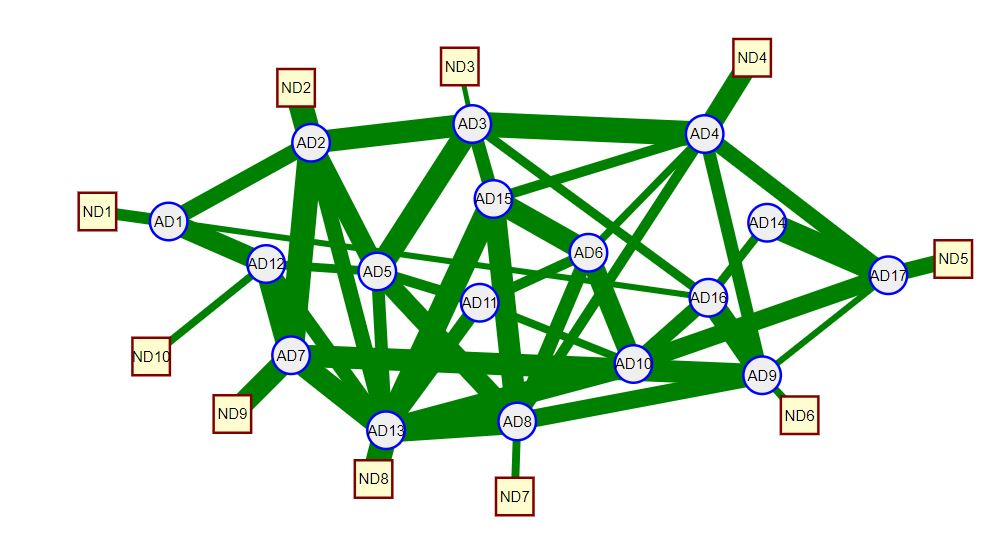

In [1]:
import networkx as nx
import json

In [2]:
# Put your (3a code here)

gnl = json.load(open("FINAL_NWD.JSON")) # For demo only, this should be your network!
g = nx.json_graph.node_link_graph(gnl)

switches = []
hosts = [] 
for n in g.nodes():
    if g.node[n]['type'] == 'host':
        hosts.append(n)
    if g.node[n]['type'] == 'switch':
        switches.append(n)

num_switch = len(switches)
num_host = len(hosts)

print(f"\nNumber of Nodes: {g.number_of_nodes()}, Number of Edges: {g.number_of_edges()}")
print("\nNumber of Switches: {}, Number of Hosts: {}".format(num_switch, num_host))
print(f"\nEdges: {list(g.edges(data=False))}")
#edges = list(g.edges(data=False))
#edges


Number of Nodes: 27, Number of Edges: 52

Number of Switches: 17, Number of Hosts: 10

Edges: [('AD1', 'AD12'), ('AD1', 'AD2'), ('AD1', 'AD16'), ('AD1', 'ND1'), ('AD2', 'AD5'), ('AD2', 'AD7'), ('AD2', 'AD13'), ('AD2', 'AD3'), ('AD2', 'ND2'), ('AD3', 'AD15'), ('AD3', 'AD5'), ('AD3', 'AD4'), ('AD3', 'AD16'), ('AD3', 'ND3'), ('AD4', 'AD17'), ('AD4', 'AD6'), ('AD4', 'AD9'), ('AD4', 'AD8'), ('AD4', 'AD15'), ('AD4', 'ND4'), ('AD5', 'AD11'), ('AD5', 'AD12'), ('AD5', 'AD8'), ('AD5', 'AD13'), ('AD6', 'AD8'), ('AD6', 'AD15'), ('AD6', 'AD10'), ('AD6', 'AD11'), ('AD7', 'AD12'), ('AD7', 'AD9'), ('AD7', 'AD13'), ('AD7', 'ND9'), ('AD8', 'AD15'), ('AD8', 'AD9'), ('AD8', 'AD13'), ('AD8', 'ND7'), ('AD9', 'AD10'), ('AD9', 'AD17'), ('AD9', 'AD16'), ('AD9', 'ND6'), ('AD10', 'AD11'), ('AD10', 'AD16'), ('AD10', 'AD17'), ('AD10', 'AD13'), ('AD11', 'AD13'), ('AD12', 'AD13'), ('AD12', 'ND10'), ('AD13', 'AD15'), ('AD13', 'ND8'), ('AD14', 'AD16'), ('AD14', 'AD17'), ('AD17', 'ND5')]


In [3]:
# Put your (3b code here)

for n in g.nodes():
    node_type = g.node[n].get("type", None)
    print("Node {} is a {}".format(n, node_type))

Node AD1 is a switch
Node AD2 is a switch
Node AD3 is a switch
Node AD4 is a switch
Node AD5 is a switch
Node AD6 is a switch
Node AD7 is a switch
Node AD8 is a switch
Node AD9 is a switch
Node AD10 is a switch
Node AD11 is a switch
Node AD12 is a switch
Node AD13 is a switch
Node AD14 is a switch
Node AD15 is a switch
Node AD16 is a switch
Node AD17 is a switch
Node ND1 is a host
Node ND2 is a host
Node ND3 is a host
Node ND4 is a host
Node ND5 is a host
Node ND6 is a host
Node ND7 is a host
Node ND8 is a host
Node ND9 is a host
Node ND10 is a host


In [4]:
# Put you (3c code here)

switch_host_map = {}
for s in switches:
    switch_host_map[s] = []
for h in hosts:
    hedges = list(g.edges(h)) # Modification for NetworkX 2.0
    if len(hedges) != 1:
        print(f"Host: {h}")
        raise Exception("Hosts must be connected to only one switch in this model")
    other = hedges[0][1]  # Should be the other side of the link
    if not other in switches:
        raise Exception("Hosts must be connected only with a switch in this model")
    switch_host_map[other].append(h)  #Okay add the host to the switch map

In [5]:
print(f"Switch to Host mapping: {switch_host_map}")

Switch to Host mapping: {'AD1': ['ND1'], 'AD2': ['ND2'], 'AD3': ['ND3'], 'AD4': ['ND4'], 'AD5': [], 'AD6': [], 'AD7': ['ND9'], 'AD8': ['ND7'], 'AD9': ['ND6'], 'AD10': [], 'AD11': [], 'AD12': ['ND10'], 'AD13': ['ND8'], 'AD14': [], 'AD15': [], 'AD16': [], 'AD17': ['ND5']}


## Problem 4. Computing Shortest Path Trees (20 pts)

**(a)** Using NetworkX create a copy of the network without any hosts (just switches and their connecting links). Print out some info on this network.

**(b)** Use NetworkX algorithm to compute all shortest paths. Show some info on these paths.

**(c)** Compute next hop port forwarding table for switches, I used a Python dictionary that mapped a (src_switch, dst_switch) tuple to an output port number where *src_switch* and *dst_switch* are switch names. Show some info on this table.



In [6]:
# (4a) Code here

g_switches = g.subgraph(switches)
print(f"Nodes with switch only network : {g_switches.nodes()}")

Nodes with switch only network : ['AD1', 'AD2', 'AD3', 'AD4', 'AD5', 'AD6', 'AD7', 'AD8', 'AD9', 'AD10', 'AD11', 'AD12', 'AD13', 'AD14', 'AD15', 'AD16', 'AD17']


In [7]:
# (4b) Code here

spaths = nx.shortest_path(g_switches, weight='weight')
spaths

{'AD1': {'AD1': ['AD1'],
  'AD10': ['AD1', 'AD12', 'AD5', 'AD11', 'AD10'],
  'AD11': ['AD1', 'AD12', 'AD5', 'AD11'],
  'AD12': ['AD1', 'AD12'],
  'AD13': ['AD1', 'AD12', 'AD13'],
  'AD14': ['AD1', 'AD16', 'AD14'],
  'AD15': ['AD1', 'AD2', 'AD3', 'AD15'],
  'AD16': ['AD1', 'AD16'],
  'AD17': ['AD1', 'AD12', 'AD5', 'AD11', 'AD10', 'AD17'],
  'AD2': ['AD1', 'AD2'],
  'AD3': ['AD1', 'AD2', 'AD3'],
  'AD4': ['AD1', 'AD2', 'AD3', 'AD4'],
  'AD5': ['AD1', 'AD12', 'AD5'],
  'AD6': ['AD1', 'AD12', 'AD5', 'AD11', 'AD6'],
  'AD7': ['AD1', 'AD12', 'AD7'],
  'AD8': ['AD1', 'AD12', 'AD5', 'AD8'],
  'AD9': ['AD1', 'AD12', 'AD5', 'AD11', 'AD10', 'AD9']},
 'AD10': {'AD1': ['AD10', 'AD11', 'AD5', 'AD12', 'AD1'],
  'AD10': ['AD10'],
  'AD11': ['AD10', 'AD11'],
  'AD12': ['AD10', 'AD11', 'AD5', 'AD12'],
  'AD13': ['AD10', 'AD13'],
  'AD14': ['AD10', 'AD16', 'AD14'],
  'AD15': ['AD10', 'AD6', 'AD15'],
  'AD16': ['AD10', 'AD16'],
  'AD17': ['AD10', 'AD17'],
  'AD2': ['AD10', 'AD11', 'AD5', 'AD2'],
  'AD3': 

In [8]:
# (4c) Code here

next_hop_port = {}
for s_src in switches:
    for s_dst in switches:
        if s_src != s_dst:
            path = spaths[s_src][s_dst]
            next_hop = path[1]  # Get the next hop along path from src to dst
            port = g_switches.get_edge_data(s_src,next_hop)["ports"][s_src]
            next_hop_port[(s_src, s_dst)] = port
            
# cur_switch = 'AD5'
# dst_switch = 'AD11'
# port = next_hop_port[(cur_switch, dst_switch)]
# print(f"{dst_switch} on {cur_switch} is {port}")
next_hop_port


{('AD1', 'AD10'): 1,
 ('AD1', 'AD11'): 1,
 ('AD1', 'AD12'): 1,
 ('AD1', 'AD13'): 1,
 ('AD1', 'AD14'): 3,
 ('AD1', 'AD15'): 2,
 ('AD1', 'AD16'): 3,
 ('AD1', 'AD17'): 1,
 ('AD1', 'AD2'): 2,
 ('AD1', 'AD3'): 2,
 ('AD1', 'AD4'): 2,
 ('AD1', 'AD5'): 1,
 ('AD1', 'AD6'): 1,
 ('AD1', 'AD7'): 1,
 ('AD1', 'AD8'): 1,
 ('AD1', 'AD9'): 1,
 ('AD10', 'AD1'): 1,
 ('AD10', 'AD11'): 1,
 ('AD10', 'AD12'): 1,
 ('AD10', 'AD13'): 6,
 ('AD10', 'AD14'): 2,
 ('AD10', 'AD15'): 3,
 ('AD10', 'AD16'): 2,
 ('AD10', 'AD17'): 5,
 ('AD10', 'AD2'): 1,
 ('AD10', 'AD3'): 3,
 ('AD10', 'AD4'): 3,
 ('AD10', 'AD5'): 1,
 ('AD10', 'AD6'): 3,
 ('AD10', 'AD7'): 6,
 ('AD10', 'AD8'): 3,
 ('AD10', 'AD9'): 4,
 ('AD11', 'AD1'): 1,
 ('AD11', 'AD10'): 2,
 ('AD11', 'AD12'): 1,
 ('AD11', 'AD13'): 3,
 ('AD11', 'AD14'): 2,
 ('AD11', 'AD15'): 4,
 ('AD11', 'AD16'): 2,
 ('AD11', 'AD17'): 2,
 ('AD11', 'AD2'): 1,
 ('AD11', 'AD3'): 1,
 ('AD11', 'AD4'): 4,
 ('AD11', 'AD5'): 1,
 ('AD11', 'AD6'): 4,
 ('AD11', 'AD7'): 3,
 ('AD11', 'AD8'): 3,
 ('AD11

## Problem 5. Programming the SDN Network (20 pts)

**(a)** Create MAC to port forwarding table for each switch based on Switch to Switch forwarding from problem 4 and the dictionary mapping switch to a list of it directly connected hosts from problem 3.

**(b)** Fill the flow tables of the switches with the forwarding information from part (a) using the Ryu REST interface.

**(c)** Perform some *ping* tests and compare the delays seen to the length of the computed paths. Show a screen shot.

**(d)** Perform a couple of *iperf* tests between some hosts and compare to the bandwidth of the smallest capacity link on the path. Show a screen shot.

In [9]:
# (5a code here)

mac_fwd_table = {}
for s_src in switches:
    mac_fwd_table[s_src] = {}  # Initialize forwarding table for each source switch
    for s_dst in switches:
        if s_src != s_dst:
            for h in switch_host_map[s_dst]:
                h_mac = g.node[h]['mac']
                mac_fwd_table[s_src][h_mac] = next_hop_port[(s_src, s_dst)]
        else:  # Host is directly connected to the switch
            for h in switch_host_map[s_dst]:
                port = g.get_edge_data(s_src,h)["ports"][s_src]
                h_mac = g.node[h]['mac']
                mac_fwd_table[s_src][h_mac] = port
ex_switch = 'AD5' 
print(f"FT for {ex_switch} : {mac_fwd_table[ex_switch]}")
#mac_fwd_table                

FT for AD5 : {'BC:A8:A6:81:3C:46': 4, 'BC:A8:A6:81:3C:47': 1, 'BC:A8:A6:81:3C:48': 3, 'BC:A8:A6:81:3C:49': 2, 'BC:A8:A6:81:3C:4E': 4, 'BC:A8:A6:81:3C:4C': 5, 'BC:A8:A6:81:3C:4B': 2, 'BC:A8:A6:81:3C:4F': 4, 'BC:A8:A6:81:3C:4D': 6, 'BC:A8:A6:81:3C:4A': 2}


In [11]:
# (5b code here)
for s in switches:
    print(f"Switch: {s}")
    for dst, port in mac_fwd_table[s].items():
        msg = {  # Forwarding table entry and switch information
        "dpid": name_id[s],   # Switch number here
        "cookie": 1,
        "cookie_mask": 1,
        "table_id": 0,
        "idle_timeout": 0,  # Doesn't idle time out
        "hard_timeout": 0,  # Doesn't hard time out
        "priority": 11111,
        "flags": 1,
        "match":{ "dl_dst":dst
        },
        "actions":[
            {
                "type":"OUTPUT",
                "port": port # Floods out of all the ports except what it came in on
            }
        ]
     }
    r = requests.post("http://127.0.0.1:8080/stats/flowentry/add", json=msg)  
    print(f"status code: {r.status_code}, response: {r.text}")

Switch: AD1


NameError: name 'name_id' is not defined

*Put your analysis and screenshots for (c) and (d) here.*